### IrisClassification using KNeighborsClassifier

In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score,recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df=pd.read_csv("Iris.csv") # Read csv dataset
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.isnull().sum() # Missing value check

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.duplicated().sum() # duplicate value check

0

In [10]:
df.Species.unique() # distinct values in species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64


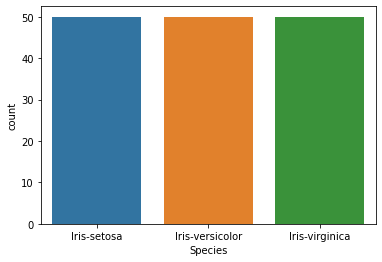

In [11]:
sns.countplot(x="Species",data=df) 
print(df["Species"].value_counts()) # check for balanced or imbalanced dataset

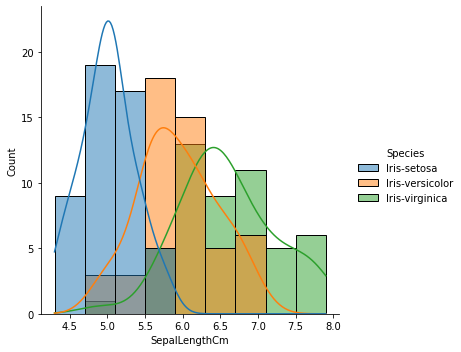

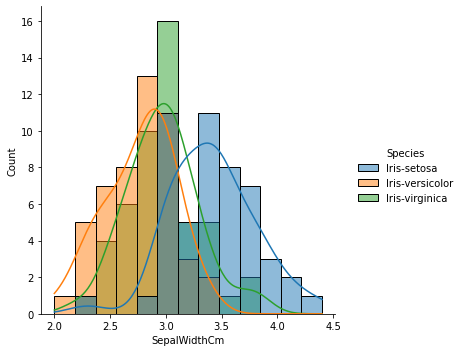

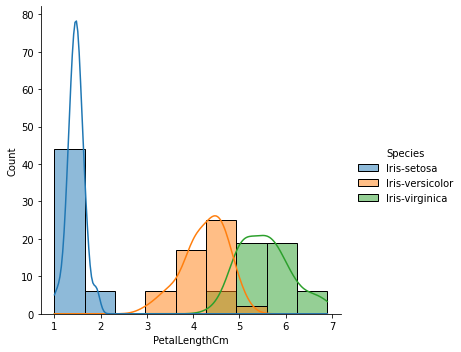

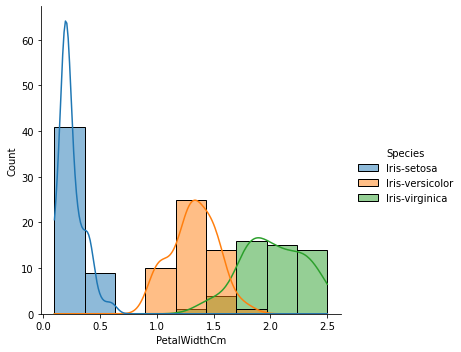

In [12]:
col=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # distribution plot
for i in col:
    sns.displot(data=df, x=df[i],hue="Species", kde=True)

#### Skewness
* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
* If the skewness is between -1 and  -0.5 or between 0.5 and 1, the data are moderately skewed
* If the skewness is less than -1 or greater than 1, the data are highly skewed

In [13]:
col.skew() # skewness 


SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

#### Kurtosis
* Kurtosis is one of the two measures that quantify shape of a distribution. kutosis determine the volume of the outlier.
* If the distribution is tall and thin it is called a leptokurtic distribution(Kurtosis > 3).
* A flat distribution where the values are moderately spread out is called platykurtic(Kurtosis <3) distribution.
* A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a mesokurtic(Kurtosis=3) distribution. A mesokurtic distribution looks more close to a normal distribution.
* Kurtosis is sometimes reported as “excess kurtosis”. Excess kurtosis is determined by subtracting 3 from the kurtosis. This makes the normal distribution kurtosis equal 0.
* Excess Kurtosis for Normal Distribution = 3–3 = 0 (mesokurtic Kurtosis =3 )
* The lowest value of Excess Kurtosis is when Kurtosis is 1 = 1–3 = -2 (platykurtic Kurtosis <3)
* (Kurtosis > 3) leptokurtic

In [14]:
col.kurt()

SepalLengthCm   -0.552064
SepalWidthCm     0.290781
PetalLengthCm   -1.401921
PetalWidthCm    -1.339754
dtype: float64

In [15]:
data=df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]] # column selection
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


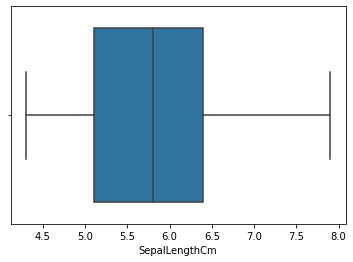

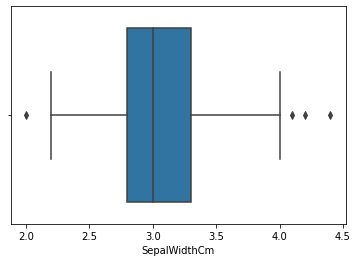

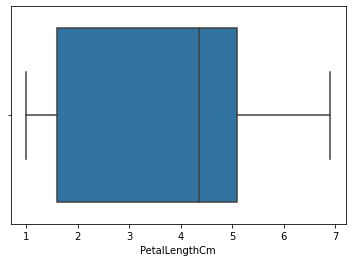

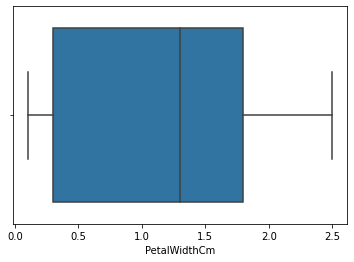

In [16]:
 # boxplot- for outlier detection 
for i in data:
    sns.boxplot(x=data[i])
    plt.show()

min_value 2.2
max_value 4.0
Q1= 2.8 Q3= 3.3 IQR= 0.5 lower_bound= 2.05 Upper_bound= 4.05


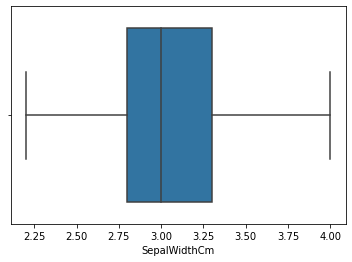

In [17]:
for i in df["SepalWidthCm"]: # outlier removal
    Q1=df["SepalWidthCm"].quantile(0.25)
    Q3=df["SepalWidthCm"].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR 
    if i>upper or i<lower:
        df["SepalWidthCm"]=df["SepalWidthCm"].replace(i,np.median(df["SepalWidthCm"]))
sns.boxplot(x=df["SepalWidthCm"])
print("min_value",df["SepalWidthCm"].min()) # IQR outlier detection
print("max_value",df["SepalWidthCm"].max()) 
print("Q1=",Q1,"Q3=",Q3,"IQR=",IQR,"lower_bound=",lower, "Upper_bound=",upper)

In [18]:
data.var() # variance 

SepalLengthCm    0.685694
SepalWidthCm     0.188004
PetalLengthCm    3.113179
PetalWidthCm     0.582414
dtype: float64

#### Covariance
* It is the relationship between a pair of random variables where change in one variable causes change in another variable.
* It can take any value between -infinity to +infinity, where the negative value represents the negative relationship whereas a positive value represents the positive relationship.
* It is used for the linear relationship between variables.
* It gives the direction of relationship between variables.

In [19]:
cov_=data.cov() # covariance
cov_

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,0.685694,-0.039268,1.273682,0.516904
SepalWidthCm,-0.039268,0.188004,-0.321713,-0.117981
PetalLengthCm,1.273682,-0.321713,3.113179,1.296387
PetalWidthCm,0.516904,-0.117981,1.296387,0.582414


#### Correlation

* It show whether and how strongly pairs of variables are related to each other.
* Correlation takes values between -1 to +1, wherein values close to +1 represents strong positive correlation and values close to -1 represents strong negative correlation.
* It gives the direction and strength of relationship between variables.

<AxesSubplot:>

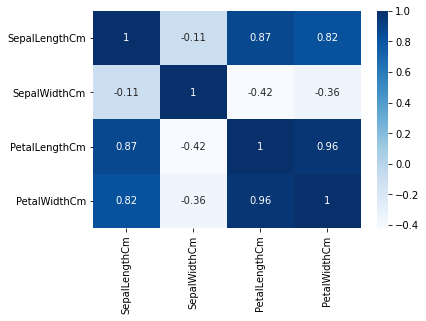

In [20]:
sns.heatmap(data.corr(),annot=True,cmap="Blues") # correlation 

<AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalLengthCm'>

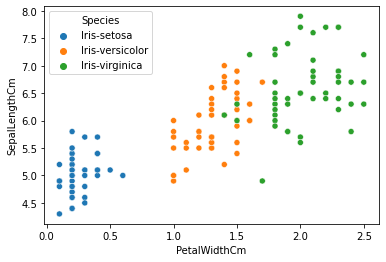

In [21]:
sns.scatterplot(x="PetalWidthCm",y="SepalLengthCm",data=df,hue="Species") # scatterplot

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalLengthCm'>

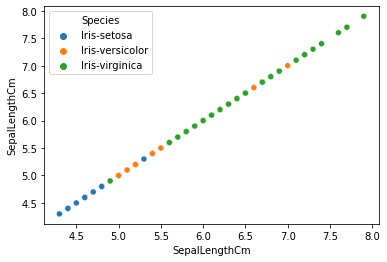

In [22]:
sns.scatterplot(x="SepalLengthCm",y="SepalLengthCm",data=df,hue="Species")

<AxesSubplot:xlabel='PetalWidthCm', ylabel='PetalLengthCm'>

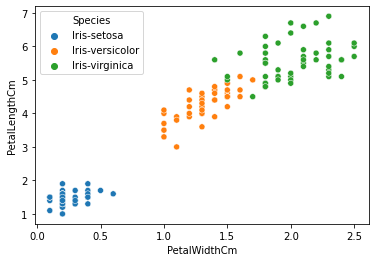

In [23]:
sns.scatterplot(x="PetalWidthCm",y="PetalLengthCm",data=df,hue="Species")

In [24]:
x=df.drop(["Species","Id"],axis=1).values
y=df["Species"].values

In [25]:
sc=StandardScaler()
x=sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3) 
knn.fit(x_train,y_train)
pred=knn.predict(x_test) #To predict the class label 

In [30]:
df1=pd.DataFrame({'actual':y_test,'predicted':pred}) # actual value and predicted value
df1

,actual,predicted
0,Iris-virginica,Iris-virginica
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-versicolor
4,Iris-virginica,Iris-virginica
5,Iris-virginica,Iris-virginica
6,Iris-virginica,Iris-versicolor
7,Iris-setosa,Iris-setosa
8,Iris-virginica,Iris-virginica
9,Iris-setosa,Iris-setosa


In [31]:
print(knn.score(x_train,y_train)) # knn score
print(knn.score(x_test,y_test))

0.9666666666666667
0.9


Accuracy_Score= 0.9 

precision_score= 0.904074074074074 

recall_score= 0.9 



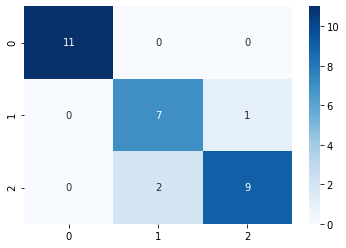

In [32]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score
sns.heatmap(metrics.confusion_matrix(y_test,pred),annot=True,cmap='Blues')
print("Accuracy_Score=",accuracy_score(y_test,pred),"\n")
print("precision_score=",precision_score(y_test,pred,average="weighted"),"\n")
print("recall_score=",recall_score(y_test,pred,average='weighted'),"\n")

In [33]:
probability =knn.predict_proba(x)[:,1] # to predict the probability of each class label
probability

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33333333, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       0.33333333, 1.        , 0.33333333, 1.        , 1.     

In [34]:
pred=knn.predict(x)

In [35]:
final_result=pd.DataFrame({'Id': df.Id, 'Response': pred})
final_result

,Id,Response
0,1,Iris-setosa
1,2,Iris-setosa
2,3,Iris-setosa
3,4,Iris-setosa
4,5,Iris-setosa
...,...,...
145,146,Iris-virginica
146,147,Iris-virginica
147,148,Iris-virginica
148,149,Iris-virginica


In [36]:
final_result.to_csv("submission.csv")